# Principal Component Analysis
## Foundations of Machine Learning
## `! git clone https://github.com/DS3001/PCA`

## Principal Component Analysis
- We've seen that when features/covariates are correlated, it can lead to problems, multi-colinearty and bad control being the main examples
- A common situation is: We have seven or eight measures of essentially the same variable, like income or health status, and "throwing them all in" seems to lead to bad results
- Question 1: How can we disentangle a set of correlated variables?
- Question 2: If we have a highly correlated set of variables that is "large", can we jointly reduce their dimension down to a smaller set of transformed variables that captures the main variation in the original set?
- The traditional solution to these questions is **Principal Componenet Analysis**, or **PCA**

## Examples
- We've seen this come up in our data frequently:
    - In the GSS, there were often a basket of questions that all tried to capture a similar --- but difficult to measure --- concept from different angles, like social/economic attitudes or attributes
    - In clinical settings, we might have a bunch of indicators of health
    - In the pretrial data, we might want to construct a measure of "criminal record", but the variables that we might use for this purpose are all highly correlated
    - In hedonic pricing with houses, larger houses typically have larger garages and more bathrooms and bedrooms and so on, so that 
- Before moving on to the PCA algorithm, let's compute some correlation matrices to see this phenomenon in practice

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Heart Attacks
- There are a variety of measurements in the heart attack data that exhibit correlation. How closely are they all related? In particular, how are the measurements correlated?

In [193]:
df_heart = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [194]:
X_heart = df_heart.loc[:,['anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'] ]
X_heart.corr()

,anaemia,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
anaemia,1.000000,-0.190741,0.031557,0.052174,0.041882
creatinine_phosphokinase,-0.190741,1.000000,-0.044080,-0.016408,0.059550
ejection_fraction,0.031557,-0.044080,1.000000,-0.011302,0.175902
serum_creatinine,0.052174,-0.016408,-0.011302,1.000000,-0.189095
serum_sodium,0.041882,0.059550,0.175902,-0.189095,1.000000


## Justice Data
- In analyzing sentences and bonds, we might want to include information about a defendant's prior record, but there are many ways to approach that question

In [195]:
df_vcc = pd.read_csv('./data/pretrial_data.csv')
df_vcc.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [196]:
X_vcc = df_vcc.loc[:,['prior_F', 'prior_M'] ]
X_vcc = X_vcc.dropna()
X_vcc.corr()

,prior_F,prior_M
prior_F,1.000000,0.424863
prior_M,0.424863,1.000000


## Hedonic Pricing
- We want to control for the "size" of the house, but we have a bunch of different metrics of house size that are all highly correlated

In [197]:
df_house = pd.read_csv('./data/pierce_county_house_sales.csv')
df_house.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [198]:
X_house = df_house.loc[:, ['house_square_feet', 'attic_finished_square_feet', 'basement_square_feet', 
                           'attached_garage_square_feet', 'detached_garage_square_feet', 'bedrooms', 'bathrooms', 'stories'] ]
X_house.dropna()
X_house.corr()

,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,bedrooms,bathrooms,stories
house_square_feet,1.000000,-0.138098,0.000840,0.565737,-0.055445,0.587945,0.742463,0.555438
attic_finished_square_feet,-0.138098,1.000000,0.074765,-0.160113,0.075351,-0.039005,-0.137345,-0.182160
basement_square_feet,0.000840,0.074765,1.000000,-0.164349,0.066942,0.108674,0.098573,-0.121985
attached_garage_square_feet,0.565737,-0.160113,-0.164349,1.000000,-0.214052,0.306366,0.528836,0.304699
detached_garage_square_feet,-0.055445,0.075351,0.066942,-0.214052,1.000000,-0.067237,-0.077656,-0.081461
bedrooms,0.587945,-0.039005,0.108674,0.306366,-0.067237,1.000000,0.569182,0.420779
bathrooms,0.742463,-0.137345,0.098573,0.528836,-0.077656,0.569182,1.000000,0.558733
stories,0.555438,-0.182160,-0.121985,0.304699,-0.081461,0.420779,0.558733,1.000000


## The General Set-up 
- This is arguably an unsupervised learning algorithm, like $K$-means clustering: We're going to take a set of variables and transform them into new variables that provide new or different information that wasn't obvious from the original set
- We have $ X=  \{ x_1, x_2, ..., x_K \} $ vectors, and they are highly correlated; these are typically a subset of the original variables, not the entire dataset
- We'd like to transform $X$ into a new set of vectors, $Z$, which are optimally de-correlated for analysis

## Orthognonal Means Uncorrelated/Independent
- We know that the covariance between our vectors is "a problem": Because the information in each vector isn't independent of the information in the other vectors, algorithms will struggle to make the best use of the information available
    - With the LASSO, when presented with two highly correlated variables, it will typically choose the "better" variable and throw away the unused information in the other variable. That's a waste.
    - With decision trees, when presented with two highly correlated variables, it will make a split on one, ignoring the common variation between the two variables, and perhaps missing out on some valuable discriminatory power. That's a waste.
- How do we "disentangle" these variables to avoid wasting information?
- We go back to the concept of "orthogonal": Two variables $i$ and $j$ are independent or orthogonal if $$ \text{corr}(x_i, x_j) = \dfrac{\text{cov}(x_i - \bar{x}_i, x_j - \bar{x}_j)}{\sigma_i \sigma_j} = 0,$$ where $\bar{x}_i$ is the mean of $x_i$ and $\sigma_i$ is the standard deviation of $x_i$
- What we really want to do is orthogonalize our variables so that we can use the de-correlated versions in our analysis

## The PCA Algorithm [Math: Linear Algebra]
If you were trapped on a desert island and had to do PCA, here are the steps:
0. **Demean the Variables in $X$**: Subtract off the average value of each variable, so all of the variables are centered around 0, so $z_k = x_k - \bar{x}_k$
1. **Compute the Correlation Matrix of $X$**: Compute the $K \times K$ covariance matrix of $Z$, 
$$ \text{cov}(Z) = \left[ \begin{array}{cccc} \text{cov}(z_1,z_1) & \text{cov}(z_1,z_2) & \dots & \text{cov}(z_1,z_K) \\ \text{cov}(z_2,z_1) & \text{cov}(z_2,z_2) & \dots &  \\ \vdots & \vdots & \ddots & \vdots \\ \text{cov}(z_K,z_1)  & \text{cov}(z_K,z_2) & \dots & \text{cov}(z_K,z_K) \end{array} \right] $$
2. **Perform a Eigenvalue Decomposition of $\text{cov}(Z)$**: This transforms $\text{cov}(Z) = PDP^{-1}$, where $D$ is a diagonal matrix with elements $(\lambda_1, \lambda_2, ..., \lambda_K)$, called eigenvalues, satisfying $\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_K$. (Because $\text{cov}(Z)$ is a covariance matrix, we know that all of the eigenvalues are real numbers and non-negative)
3. **Transform the Data**: Take the first $L$ eigenvectors of the decomposition of the correlation matrix, $P_{1:K, 1:L}$, multiply this times the original data, and add the means back in, as
$$
X_{PCA} = Z \cdot P_{1:K,1:L} + \bar{x}[1:L]
$$
This gives an $(N \times K) \times (K \times L) = N \times L$ matrix, reducing the dimension of the data from $K$ to $L$.

In [199]:
## A PCA Decomposition of Housing Variables:

def demean(x):
    xbar = np.mean(x)
    z = x-xbar
    return(z)
Z_house = X_house.apply(demean)
X_mean = X_house.mean().to_numpy()

# Step 1: Compute correlation matrix
C_house = Z_house.cov()

# Step 2: Eigen decomposition and rank by eigenvalues
eigen = np.linalg.eig(C_house) # Perform eigenvalue decomposition
eig_val = eigen.eigenvalues[ np.argsort(-eigen.eigenvalues) ]
eig_vect = eigen.eigenvectors[ :, np.argsort(-eigen.eigenvalues) ]
x_means = X_mean[ np.argsort(-eigen.eigenvalues) ] 
eig_val = eig_val/np.sum(eig_val)
eig_vect = eig_vect/np.sum(eig_vect,axis = 1)
print('Sorted Eigenvalues: ', eig_val, '\n')
print('Sorted Eigenvectors: ', eig_vect, '\n')

# Step 3: Compute Feature Matrix
L = 3 # Number of principal components to use
components = eig_vect[:,0:L]
x_means = x_means[:L]

# Step 4: Transform Variables
transformed = Z_house @ components +x_means # Multiple original data times the principal componenet filter, plus the mean

print('Dimensions of final data: ', transformed.shape) # Dimension reduction!


Sorted Eigenvalues:  [6.88906964e-01 2.12304410e-01 5.95085835e-02 2.79028394e-02
 1.13761086e-02 6.27513690e-07 3.07117581e-07 1.60085543e-07] 

Sorted Eigenvectors:  [[ 1.50554490e+00  4.30164906e-02  2.66844831e-01 -3.23834665e-02
  -1.51004827e-02 -1.94179154e-03 -5.68376729e-04 -3.44350905e-05]
 [-2.99432078e-02  1.86908704e-02  5.18276397e-02  2.10039770e-02
  -1.48859010e+00 -2.29872880e-04  6.72035742e-04  2.46394961e-04]
 [-1.64349219e-02  9.43757987e-01 -1.85063034e-01  4.20382512e-03
   1.97224850e-02 -5.30938622e-04 -8.79072115e-05  1.65715579e-04]
 [ 3.54413626e-01 -1.35006391e-01 -1.11445518e+00  1.82520211e-01
  -5.61990752e-02 -2.16965200e-04 -5.54919772e-04  2.29173953e-04]
 [-2.43754090e-02  3.46791049e-02  3.38785912e-01  6.25000656e-01
   6.55229065e-02  5.71017167e-04 -1.09802910e-05  7.61896943e-05]
 [ 1.03244820e-03  2.42430032e-04  1.51320864e-04 -1.90822176e-04
  -4.94166797e-04  1.84343125e+00 -5.21213089e-01 -1.14294731e-02]
 [ 1.23154641e-03  1.90341791e-04 

## How to Pick the Number of Components
- Since PCA can be understood as a projection/regression, we can define an $R^2$ measure: How much of the variation in the original data is explained by the transformed data?
- This corresponds to summing the eigenvalues, once they're normalized so they sum to 1
- If you merely plot the normalized eigenvalues, you get a scree plot: How much variation does each component explain? Find the elbow, etc.
- If you cumulatively sum the normalized eigenvalues, you get the total $R^2$ of that number of components: How much total variation is explained by this many components?
- The number of components requried depends on the applications

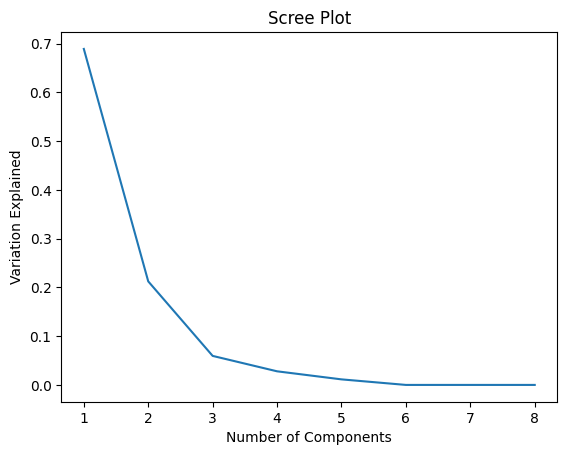

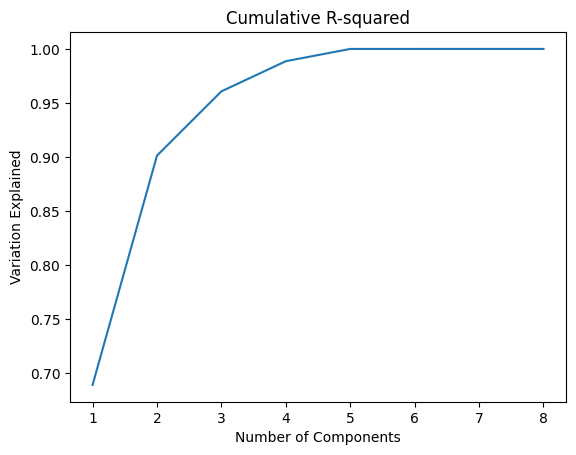

In [200]:
# Scree plot:
x = np.linspace(1, Z_house.shape[1],Z_house.shape[1])
y = eig_val
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Scree Plot')
plt.show()

# R^2 plot:
x = np.linspace(1, Z_house.shape[1],Z_house.shape[1])
y = np.cumsum(eig_val)
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variation Explained")
plt.title('Cumulative R-squared')
plt.show()

## Why does PCA Work?
- The core idea of eigenvalue decomposition is to take a symmetric matrix (the covariance matrix) and decompose it into a set of vectors that are independent/orthogonal
- Picking the first $L$ of $K$ components of that decomposition and multiplying it by the data yields a transformation of the original data in a simpler space: We embed the original data in a lower dimensional space
- PCA can be interepted as solving a minimization problem: Pick $L$ vectors that minimize the sum of squared error of the original data to the transformed data, where the transformed data live in a lower dimensional space

## PCA with Sci-Kit
- Of course, sci-kit implements this in a fairly straightforward way:
    1. Import your PCA class: `from sklearn.decomposition import PCA`
    2. Create a PCA class instance: `pca = PCA(n_components = L)`
    3. Fit the PCA transformer: `pca.fit(X)`
    4. Transform the data as desired: `pca.transform(X_new)`
- Sci-Kit does other things besides the steps I listed above. The steps I gave are "vanilla" PCA and Sci-Kit is more of a spicy PCA.

In [201]:
## Housing PCA with sci-kit:

from sklearn.decomposition import PCA

pca = PCA(n_components = 1) # Create PCA instance
pca = pca.fit(X_house) # Create the decomposition
Z_house = pca.transform(X_house) # Project house data; could use new data or test data


## Application: Indices
- There are a variety of indices published for making comparisons across countries: Human Development Index, V-Dem
- Take your correlated variables on topic $Y$, conduct PCA, extract the first componenet, and call that an "Index of $Y$"
- This is particularly popular in finance, and people try to brand the principal components: "Volatility", "Liquidity", etc.
- I am deeply skeptical of this kind of work. To me, PCA is a computational step to get traction on handling high dimensional data, and not an end in itself. Interpreting the eigenvalues and components can often drift closer to astrology than science.

## Application: Clustering
- When clustering, we often do PCA on the clustering variables to orthogonalize them and improve performance
- So you first maxmin normalize, then apply PCA, and finally conduct the $K$-means algorithm (or another) on the transformed data
- This also aids visualization: You can plot the first two principal components against the final cluster assignment to visualize your results, even when the data are high-dimensional

## Application: Regression
- Rather than LASSO or fuss around to do feature selection, why not transform the data with PCA, then chose which $L$ of $K$ transformed variables to include as features/covariates?
- This is very clever: For $K$ features/covariates, there are $2^K$ possible choices of subsets of variables, while with PCA, there are only $K$ ways to choose the first $L$ principal components
- Problem: Explainability/Interpretability suffers, because we can't really make sense of what the transformed variables really mean. They're just a technology to make predictions, and rely on the dimensions we dropped. You can use this for prediction-making, but interpreting indices and including them as covariates is not typically a responsible thing to do.

## Application: Image Processing
- Images are typically very high dimensional data: Imagine a black-and-white image is encoded as $R \times C$ pixel values of grey coded from white to black. For a high resolution photo, that will be extremely high dimensional (and for color we would have to track four such matrices, corresponding to cyan/magenta/yellow/black)
- PCA provides a way of "strategically throwing away" data to compress images and sound by filtering by the first $K$ components
- This is used extensively in the natural language processing literature as something called word2vec: word2vec is just one-hot encoding sentences, taking the transpose, then applying PCA

## Conclusion
- PCA is a very valuable tool to have available for dimensionality reduction of complex data
- Whenever you're in a situation where you have baskets of variables that are all similar, you can de-correlate them and scale the complexity of the resulting set up and down to taste
- This is primarily a computational tool that conducts an intermediate step to process data, and interpreting the results is kind of fool-hardy unless you really know what you're doing. Personally, I am very skeptical of results for which the PCA is itself the final result (similar to clustering)
- Any good idea, of course, has a huge number of extensions and imitations: This is the entry level version of a set of big ideas that you can explore and adapt to your specific problems